In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv("../input/metrics-predictor.csv")
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [70]:
# Filling the missing values with the median
df['age'] = df ['age'].fillna(df['age'].median())
df['height'] = df ['height'].fillna(df['height'].median())
df['size'] = df['size'].map({'XXS': 1, 'S': 2, "M" : 3, "L" : 4, "XL" : 5, "XXL" : 6, "XXXL" : 7})

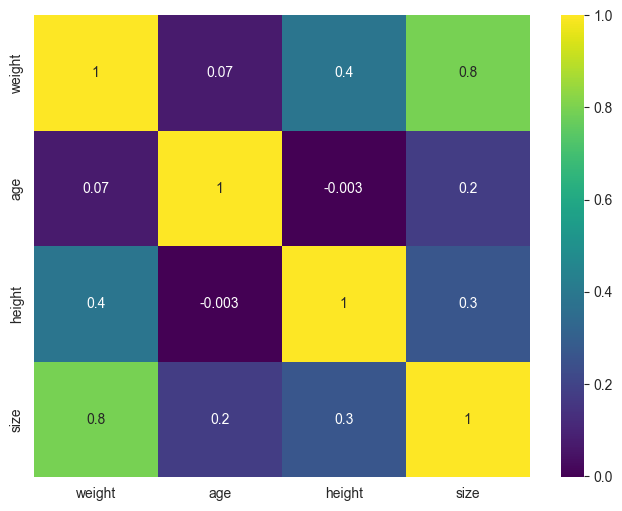

In [71]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis",);

In [72]:
X = df.drop("size", axis=1)
y = df["size"]
X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [73]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.predict(X_test)
LinearRegressionScore = clf.score(X_test,y_test)
print("Accuracy obtained by Linear Regression model:", LinearRegressionScore*100)

Accuracy obtained by Linear Regression model: 64.48743985132815


In [74]:
import joblib

# Create a dictionary with the model and any necessary preprocessing components
model_export = {
  'model': clf,
  'feature_names': X.columns.tolist()
}

# Save the model to a file
joblib.dump(model_export, 'size_predictor_model.joblib')

# Example of how to use the saved model
# Loading and usage example:
print("Example of how to load and use the model:")
print("""
# Load the model
loaded_model = joblib.load('size_predictor_model.joblib')

# Prepare input data (must have the same features: weight, age, height)
input_data = pd.DataFrame({
  'weight': [65],
  'age': [30],
  'height': [170]
})[loaded_model['feature_names']]

# Make prediction
prediction = loaded_model['model'].predict(input_data)
print(f'Predicted size: {prediction[0]}')
""")

Example of how to load and use the model:

# Load the model
loaded_model = joblib.load('size_predictor_model.joblib')

# Prepare input data (must have the same features: weight, age, height)
input_data = pd.DataFrame({
  'weight': [65],
  'age': [30],
  'height': [170]
})[loaded_model['feature_names']]

# Make prediction
prediction = loaded_model['model'].predict(input_data)
print(f'Predicted size: {prediction[0]}')

